In [178]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [179]:
"""
Returns an array of type:
 - [x, y] for grayscale images
 - [x, y, [R, G, B]] for RGB images
 - [x, y, [R, G, B, A]] for RGBA images
"""
def read_image(filename):
    img = image.imread(filename)
    return img

In [180]:
"""
Função para mostrar uma imagem. Aceita um colormap definido pelo utilizador ou os do matplotlib

"""
    
def show_image(img, colormap = None):    
    plt.figure(figsize=(8,8))
    
    # Imagens com apenas uma coponenete: R, G, B ou Grayscale
    if len(img.shape) == 2:
        plt.imshow(img, cmap = colormap)
    else:
        if colormap != None:
            new_img = img[:, :, 0]
            plt.imshow(new_img, cmap = colormap)
        else:
            plt.imshow(img)

    plt.axis('off')
    plt.show()

> # Semana 1
Na diretória imagens estão presentes as imagens jpeg com baixa, média e alta qualidade, consoante os nomes das pastas;


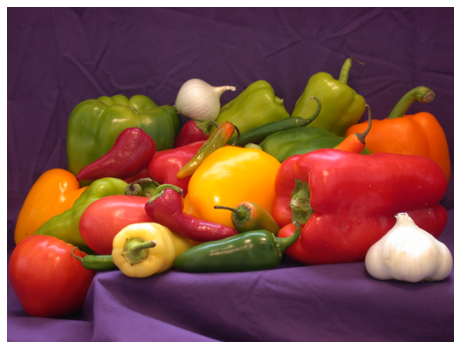

In [181]:
img = read_image('imagens/peppers.bmp')
#img = read_image('imagens/barn_mountains.bmp')
#img = read_image('imagens/logo.bmp')

show_image(img)


Tamanho dos ficheiros .bmp

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|  size  |   356.5KB  |    589.9KB   |   421.6KB  |


<br>
Tamanho dos ficheiros após compressão para JPEG

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|   Low  |   43.4KB  |    35.2KB    |   21.9KB  |
| Medium |   51.5KB  |    41.3KB    |   23.1KB  |
|  High  |   67.5KB  |    57.7KB    |   27.3KB  |

<br>
Rácio de compressão

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|   Low  |   8.2:1  |    16.7:1    |   19.3:1  |
| Medium |   6.9:1  |    14.3:1    |   18.3:1  |
|  High  |   5.2:1  |    10.2:1    |   15.4:1  |

In [182]:
low = image.imread('imagens/Low/peppers.jpg')
low.shape

(384, 512, 3)

In [183]:
medium = image.imread('imagens/Medium/peppers.jpg')
medium.shape

(384, 512, 3)

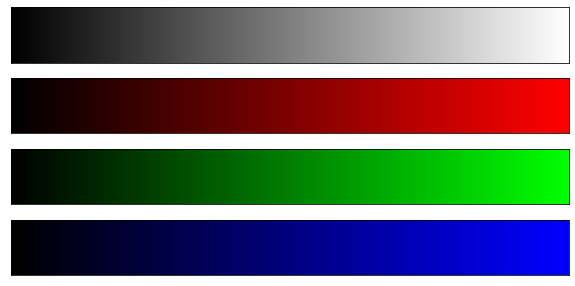

In [198]:
# ColorMaps
cm_gray = clr.LinearSegmentedColormap.from_list('gray', [(0,0,0), (1, 1, 1)], N = 256)
cm_red = clr.LinearSegmentedColormap.from_list('red', [(0,0,0), (1, 0, 0)], N = 256)
cm_green = clr.LinearSegmentedColormap.from_list('green', [(0,0,0), (0, 1, 0)], N = 256)
cm_blue = clr.LinearSegmentedColormap.from_list('blue', [(0,0,0), (0, 0, 1)], N = 256)

# Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
cmap = plt.cm.get_cmap(cm_gray)
gray = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_red)
red = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_green)
green = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_blue)
blue = cmap(np.arange(cmap.N))

fig, ax = plt.subplots(4, figsize=(10, 5),subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow([gray], extent=[0, 10, 0, 1])
ax[1].imshow([red], extent=[0, 10, 0, 1])
ax[2].imshow([green], extent=[0, 10, 0, 1])
ax[3].imshow([blue], extent=[0, 10, 0, 1])

In [200]:
"""
Separar uma imagem RGB nos seus componentes
"""
def separate_rgb(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    return r, g, b

In [ ]:
r, g, b = separate_rgb(img)
show_image(r, cm_red)
show_image(g, cm_green)
show_image(b, cm_blue)

In [201]:
"""
Juntar as coponentes R, G e B para formar uma imagem
"""
def join_rgb(r, g, b):
    return np.dstack((r, g, b))

In [ ]:
img = join_rgb(r, g, b)
show_image(img)

In [ ]:
"""
Recebe uma imagem e altera as suas dimensões para (m,n) multiplas de (16,16).
Isto é realizado através da cópia da ultima coluna/linha até atingir o valor multiplo de 16.
"""
def padding(img : np.array):
    img = img.copy()
    while img.shape[0]%16 != 0:
        img = np.concatenate((img, [img[-1]]), axis = 0)
    while img.shape[1]%16 != 0:
        img = np.concatenate((img, [img[:,-1]]), axis = 1)
    return img


In [202]:
"""
Recebe uma imagem e, enquanto a ultima coluna/imagem for igual à penultima, elimina-a
"""
def unpad(img : np.array):
    img = img.copy()
    while np.all(img[-1] == img[-2]):
        if len(img.shape) == 2:
            img = np.resize(img, (img.shape[0] - 1, img.shape[1]) )
        else:
            img = np.resize(img, (img.shape[0] - 1, img.shape[1], img.shape[2] ) )
    while np.all(img[:, -1] == img[:, -2]):
        if len(img.shape) == 2:
            img = np.resize(img, (img.shape[0], img.shape[1] - 1) )
        else:
            img = np.resize(img, (img.shape[0], img.shape[1] - 1, img.shape[2] ) )
    return img

In [203]:
"""
Converte imagem no formato RGB para imagem no formato yCbCr;
"""
def rgb_to_ycbcr(img : np.array):
    img.copy()
    y = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114*img[:,:,2]
    cb = (img[:,:,2] - y)/1.772 + 128
    cr = (img[:,:,0] - y)/1.402 + 128
    
    y_cb_cr = np.dstack((y, cb, cr))
    return y_cb_cr


In [204]:
"""
Converte imagem no formato yCbCr para imagem no formato RGB;
"""
def ycbcr_to_rgb(img : np.array):
    img = img.copy()
    y = img[:,:,0]
    cb = img[:, :, 1] - 128
    cr = img[:, :, 2] - 128
    
    r = y + 1.402 * cr
    g = y - 0.344136*cb - 0.714136*cr
    b = y + 1.772*cb
    
    rgb = np.dstack((r,g,b))
    np.round(rgb)
    rgb[rgb>255] = 255
    rgb[rgb < 0] = 0
    
    return np.array(rgb, dtype = np.uint8)